<a href="https://colab.research.google.com/github/vataliya/cav_security_attacls/blob/main/cav_sec_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Colab\ Notebooks/kdd99/NSL-KDD

/content/drive/My Drive/Colab Notebooks/kdd99/NSL-KDD


In [3]:
import time
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [4]:
columns = ['duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'labels'
]


In [5]:
cav_attacks_list = [
    'ipsweep',
    'imap',
    'mailbomb', 
    'neptune', 
    'pod', 
    'smurf', 
    'teardrop', 
    'udpstorm',
    'buffer_overflow', 
    'httptunnel',
    'ftp_write', 
    'guess_passwd', 
    'worm', 
    'xsnoop',
    'normal']

In [6]:
columns_sc = ['duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

In [7]:
nsl_kdd_20p_train = pd.read_csv('KDDTrain+_20Percent.txt', names = columns, index_col=False)
cav_train = nsl_kdd_20p_train[nsl_kdd_20p_train['labels'].isin(cav_attacks_list)]

In [8]:
nsl_kdd_20p_test = pd.read_csv('KDDTest-21.txt', names = columns, index_col=False)
cav_test = nsl_kdd_20p_test[nsl_kdd_20p_test['labels'].isin(cav_attacks_list)]

In [9]:
attacks = np.concatenate((nsl_kdd_20p_train['labels'].unique(),nsl_kdd_20p_test['labels'].unique()))
attacks = np.unique(attacks)

In [10]:
nsl_kdd_20p_train_list = nsl_kdd_20p_train['labels'].value_counts()
cav_train_list = cav_train['labels'].value_counts()
nsl_kdd_20p_test_list = nsl_kdd_20p_test['labels'].value_counts()
cav_test_list = cav_test['labels'].value_counts()

In [11]:
dataset_values = pd.DataFrame(index = attacks, 
                              columns = ['NSL_KDD_Train', 'NSL_KDD_Test'])
#                                          ,'CAV_Train', 'CAV_Test'])
dataset_values['NSL_KDD_Train'] = nsl_kdd_20p_train_list
dataset_values['NSL_KDD_Test'] = nsl_kdd_20p_test_list
dataset_values['CAV_Train'] = cav_train_list
dataset_values['CAV_Test'] = cav_test_list
dataset_values.sort_values(by=['NSL_KDD_Train'], ascending = False)

,NSL_KDD_Train,NSL_KDD_Test,CAV_Train,CAV_Test
normal,13449.0,2152.0,13449.0,2152.0
neptune,8282.0,1579.0,8282.0,1579.0
ipsweep,710.0,141.0,710.0,141.0
satan,691.0,727.0,NaN,NaN
portsweep,587.0,156.0,NaN,NaN
smurf,529.0,627.0,529.0,627.0
nmap,301.0,73.0,NaN,NaN
back,196.0,359.0,NaN,NaN
teardrop,188.0,12.0,188.0,12.0
warezclient,181.0,NaN,NaN,NaN


In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for i in columns:
    cav_train[i] = le.fit_transform(cav_train[i])
    cav_test[i] = le.fit_transform(cav_test[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
x_train = cav_train.drop(columns= ['labels'])
y_train = cav_train['labels']

x_test = cav_test.drop(columns= ['labels'])
y_test = cav_test['labels']

In [14]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#scaling the data
sc=StandardScaler()
xsc_train = sc.fit_transform(x_train)
xsc_test = sc.transform(x_test)

xsc_train=pd.DataFrame(xsc_train, columns = columns_sc)
xsc_test=pd.DataFrame(xsc_test, columns = columns_sc)

X_loc_train = xsc_train.iloc[:,:].values
X_loc_test = xsc_test.iloc[:,:].values

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 2)
x_pca_train = pca.fit_transform(xsc_train)
print(x_pca_train.shape)

x_pca_train =pd.DataFrame(x_pca_train)
X_pca_loc_train = x_pca_train.iloc[:,:].values

(23218, 2)


In [19]:
pca = PCA(n_components = 2)
x_pca_test = pca.fit_transform(xsc_test)
print(x_pca_test.shape)

x_pca_test = pd.DataFrame(x_pca_test)
X_pca_loc_test = x_pca_test.iloc[:,:].values

(6241, 2)


In [20]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [21]:
dataset = x_pca_train
X = X_pca_loc_train

Number of Cluster: 3 and Noise: 49
Time Elapsed: 2.3305320739746094 


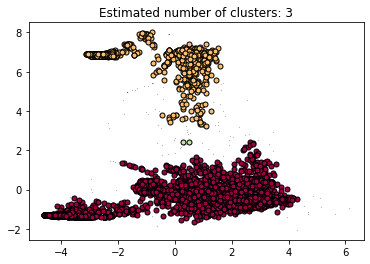

In [22]:
#DBSCAN Algorithm
start_time = time.time()
clustering = DBSCAN(min_samples = 10, n_jobs=-1).fit(dataset)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Cluster:',n_clusters_,'and Noise:', n_noise_)

# Plotting the DBSCAN Clusters:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.1)

end_time = time.time()
duration = end_time - start_time
print("Time Elapsed: {} ".format(duration))

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

For n_clusters = 3 , the average silhouette_score is : 0.8316414269066434
For n_clusters = 5 , the average silhouette_score is : 0.6950801917700311
For n_clusters = 7 , the average silhouette_score is : 0.6040937500525064
For n_clusters = 9 , the average silhouette_score is : 0.6292361749257761
Time Elapsed: 48.399662494659424 


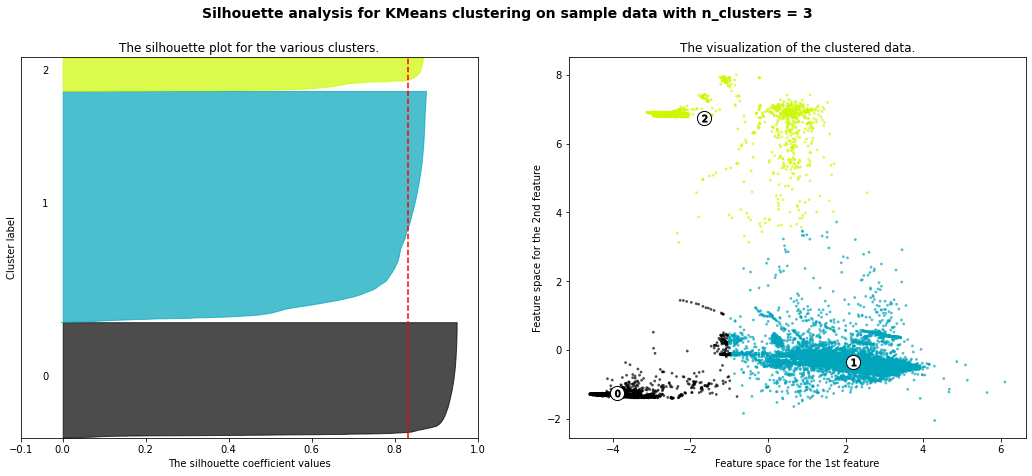

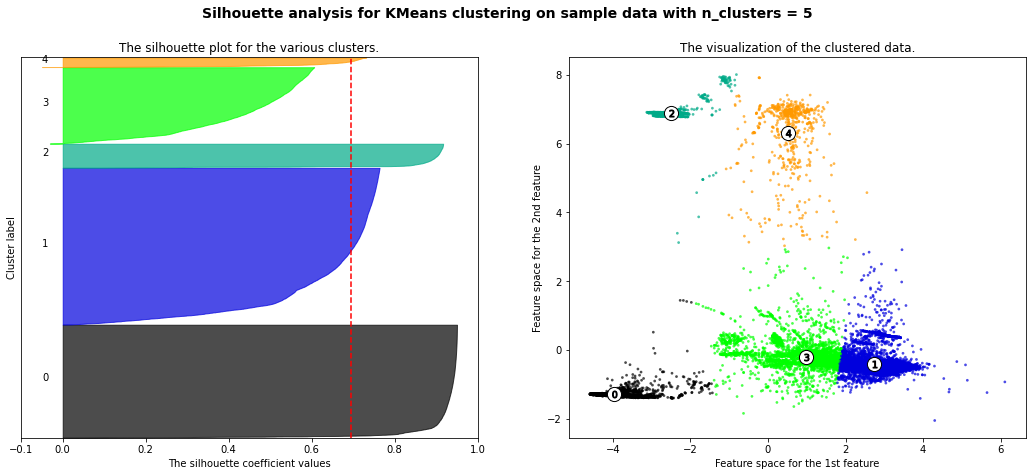

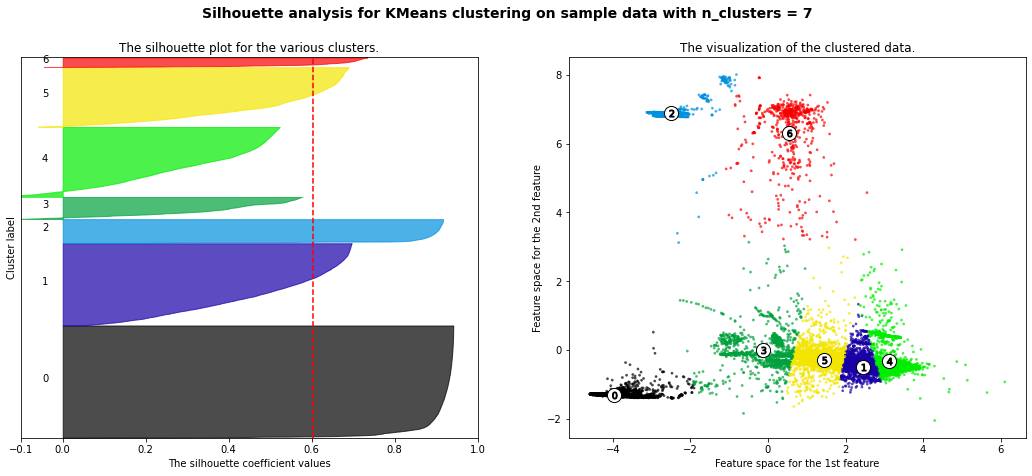

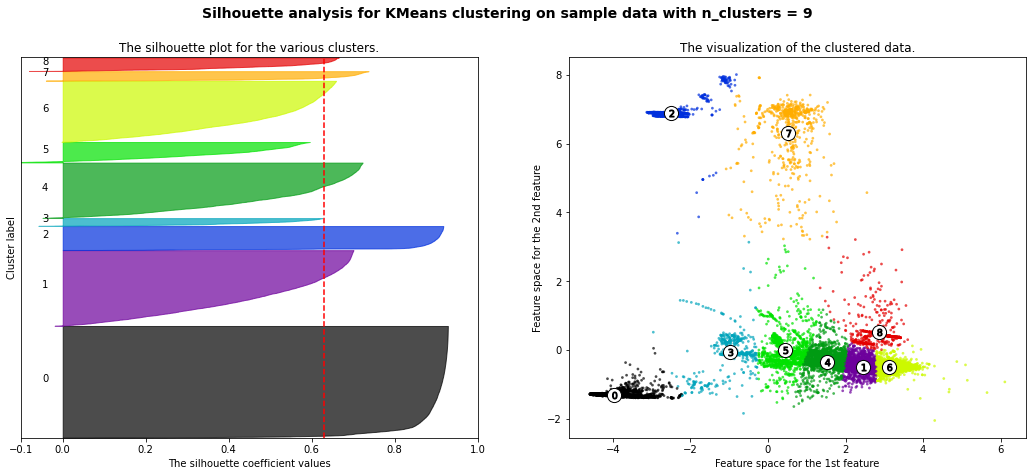

In [23]:
#KMeans Clustering Algorithm:
range_n_clusters = range(3,(11),2)
silhouette_scores = []
labels_list = []
start_time = time.time()

# Initialize the clusterer with n_clusters value:
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(dataset)
    cluster_labels = clusterer.labels_
    labels_list.append(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,", the average silhouette_score is :", silhouette_avg)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

end_time = time.time()
duration = end_time - start_time
print("Time Elapsed: {} ".format(duration))

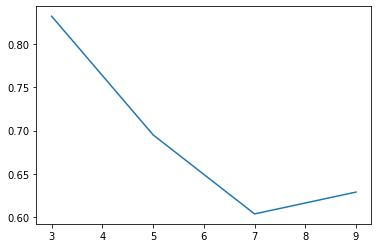

In [26]:
plt.plot(range(3,11,2), silhouette_scores)

In [24]:
dataset = x_pca_test
X = X_pca_loc_test

Number of Cluster: 4 and Noise: 11
Time Elapsed: 0.18454909324645996 


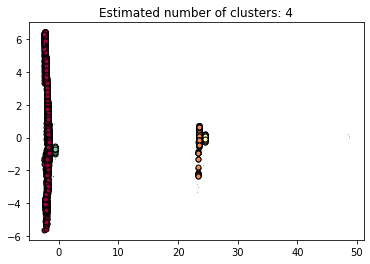

In [25]:
#DBSCAN Algorithm
start_time = time.time()
clustering = DBSCAN(min_samples = 10, n_jobs=-1).fit(dataset)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Cluster:',n_clusters_,'and Noise:', n_noise_)

# Plotting the DBSCAN Clusters:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.1)

end_time = time.time()
duration = end_time - start_time
print("Time Elapsed: {} ".format(duration))

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

For n_clusters = 3 , the average silhouette_score is : 0.6279582786166221
For n_clusters = 5 , the average silhouette_score is : 0.686078922370297
For n_clusters = 7 , the average silhouette_score is : 0.6839085966265894
For n_clusters = 9 , the average silhouette_score is : 0.6818637270833318
Time Elapsed: 6.287559747695923 


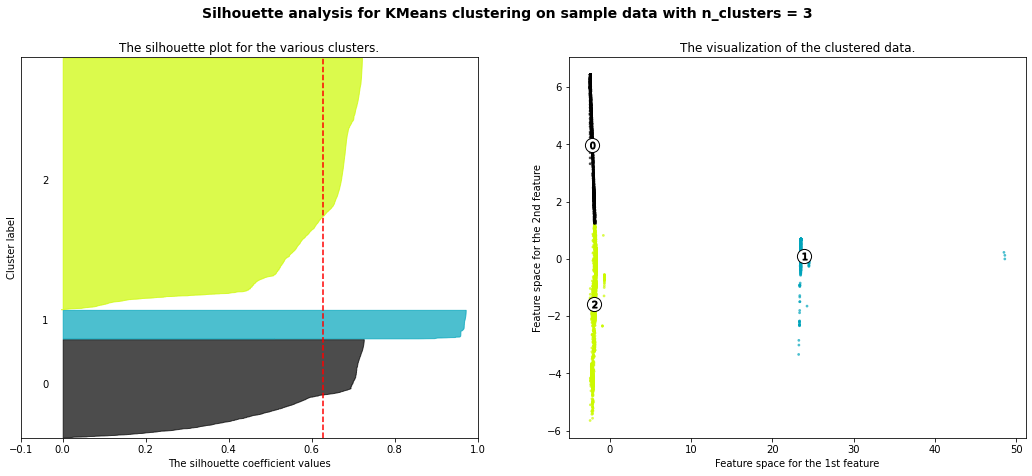

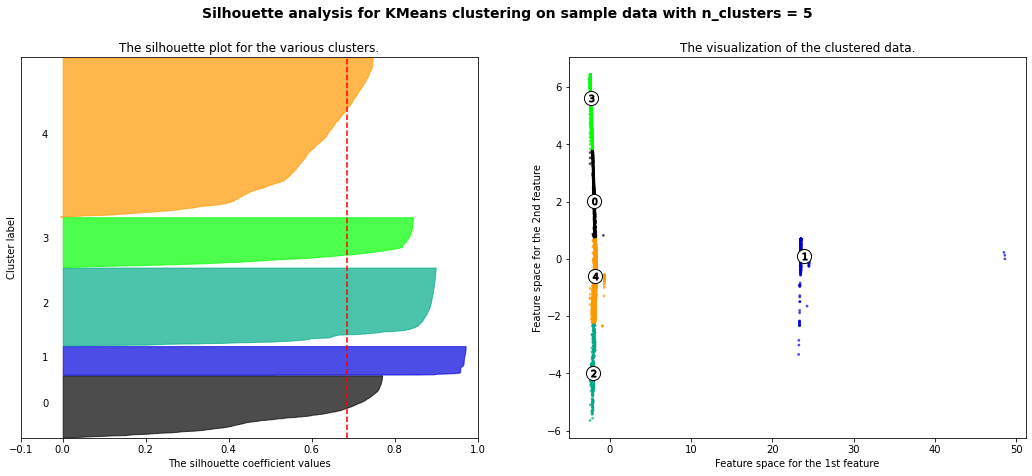

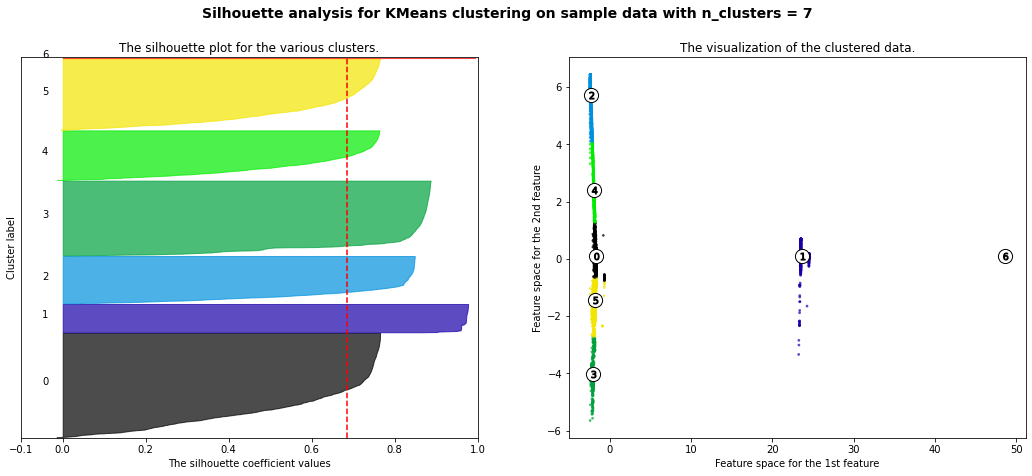

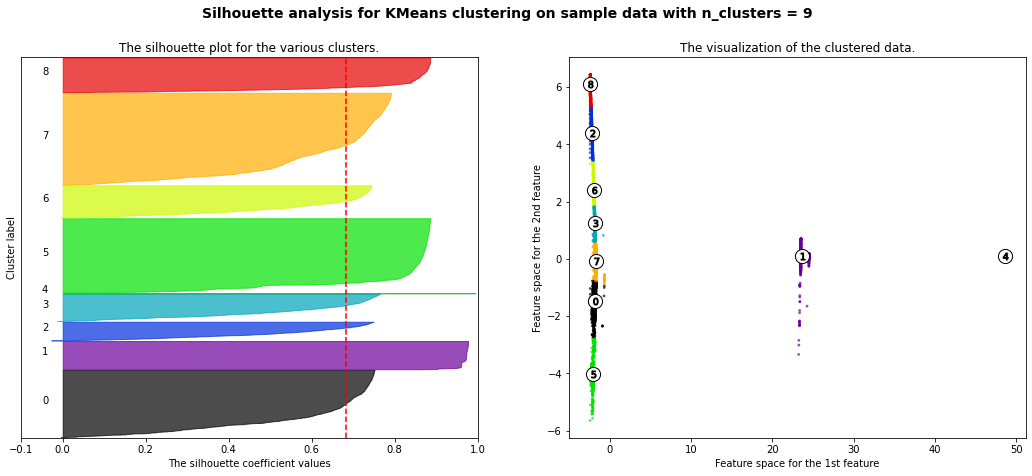

In [27]:
#KMeans Clustering Algorithm:
range_n_clusters = range(3,(11),2)
silhouette_scores = []
labels_list = []
start_time = time.time()

# Initialize the clusterer with n_clusters value:
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(dataset)
    cluster_labels = clusterer.labels_
    labels_list.append(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,", the average silhouette_score is :", silhouette_avg)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

end_time = time.time()
duration = end_time - start_time
print("Time Elapsed: {} ".format(duration))

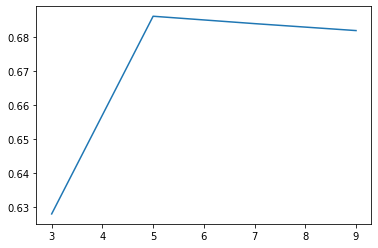

In [28]:
plt.plot(range(3,11,2), silhouette_scores)